In [1]:
import timeit
import psutil
import sys
import os
import matplotlib.pyplot as plt

from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor as Pool

In [2]:
os.chdir('../../../')
sys.path.append(os.getcwd())


from Algorithms_Python.merge_sort import merge_sort
from Algorithms_Python.count_sort import count_sort
from Algorithms_Python.digit_sort import digit_sort, digit_sort_opt
from Algorithms_Python.tests.test_sorts_and_searches import whole_1_dim_array

In [3]:
def measure_runtime(func, params, array):
    start_time = timeit.default_timer()
    func(array, **params)
    end_time = timeit.default_timer()
    runtime = end_time - start_time
    return runtime

In [4]:
def run_tests_int(sort_functions, funcs_params, input_sizes, input_range,
                    executor=Pool):
    data = {label: [] for _, label in sort_functions}
    with executor(max_workers=cpu_count()) as pool:
        for sort_func, label in sort_functions:
            for size in input_sizes:
                array = whole_1_dim_array(
                    elts_range=input_range, size_of_1_dim_range=size)
                data[label].append(pool.submit(
                    measure_runtime, sort_func,
                    funcs_params[str(sort_func.__name__)],
                    array))
        for sort_func, label in sort_functions:
            for i in range(len(data[label])):
                data[label][i] = data[label][i].result()
    return data

In [12]:
def plot_results(data_to_plot):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    for label in data_to_plot:
        ax1.plot([i[0] for i in input_sizes], [sum(runtime)/len(runtime) \
                    for runtime in data_to_plot[label]], marker='o', label=f'{label} (Runtime)')

    ax1.set_xlabel('Input Size')
    ax1.set_ylabel('Runtime (seconds)')
    #ax1.set_xscale('log')
    fig.legend(loc='upper right')
    plt.grid(True)
    plt.title('Sorting Algorithms\' Runtimes')
    plt.show()

Let's try some sorts of integers, compare them to others and optimize them. We will start the same way as with sorts for float numbers.

Now, for many described sorts an input of the array has an influence on the time complexity not only in terms of the size of the array but more in terms of **number ranges**. We will compare them with the merge sort algorithm for floats and run them all on different inputs.

In [13]:
input_sizes = [(1, 1), (5, 5), (10, 10), (50, 50), (100, 100), (500, 500), (1000, 1000)]

sorting_algorithms = [
    (count_sort, 'Count Sort'),
    (digit_sort, 'Digit Sort'),
    (digit_sort_opt, 'Digit Sort Opt'),
    (merge_sort, 'Merge Sort')
]

funcs_params = {
    'count_sort': {},
    'digit_sort': {},
    'merge_sort': {},
    'digit_sort_opt': {}
}

input_range = (-100, 100)

In [14]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

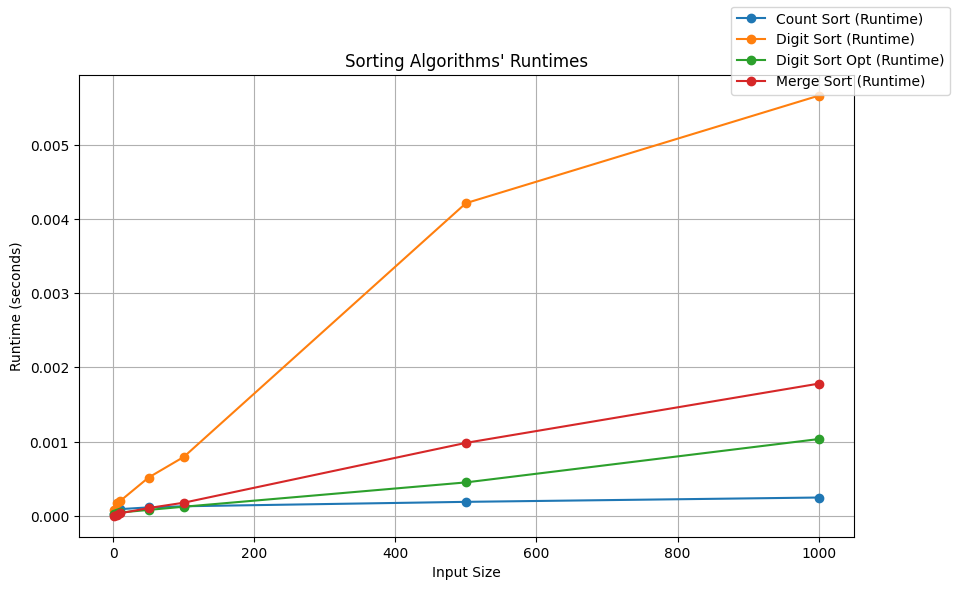

In [16]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

There are 2 different digit sorts imported. One (unoptimized) utilizes more bold approach: extracts digits from numbers, places them into arrays, adds (-inf)s in the front of the arrays, so that they would make a rectangular 2-dim matrix, and then sorts it using a counting sort. The second one utilizes a radix sort approach with buckets.

Now, let's look at the start of these curves.

In [17]:
input_sizes = [(1, 1), (5, 5), (10, 10), (20, 20), (50, 50), (70, 70), (100, 100)]

In [18]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

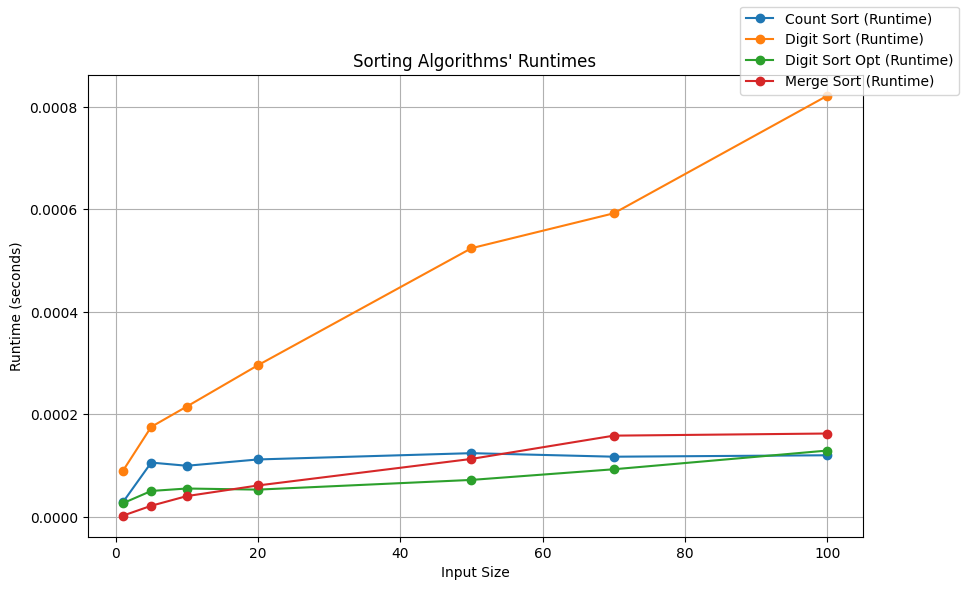

In [19]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

It is clear that unoptimized digit sort is the worst from the very start - that is why it will not be considered further.

It is also worth noting that at the very start merge sort shows the best performance - and it is not an **actual** merge sort, it is the insertion sort which significantly optimizes merge sort performance when embedded into it to sort small parts of the starting array.

Now, let's increase the input size.

In [20]:
input_sizes = [(1000, 1000), (5000, 5000), (10000, 10000), (50000, 50000), 
               (100000, 100000), (500000, 500000)]

sorting_algorithms = [
    (count_sort, 'Count Sort'),
    (digit_sort_opt, 'Digit Sort Opt'),
    (merge_sort, 'Merge Sort')
]

funcs_params = {
    'count_sort': {},
    'merge_sort': {},
    'digit_sort_opt': {}
}

In [21]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

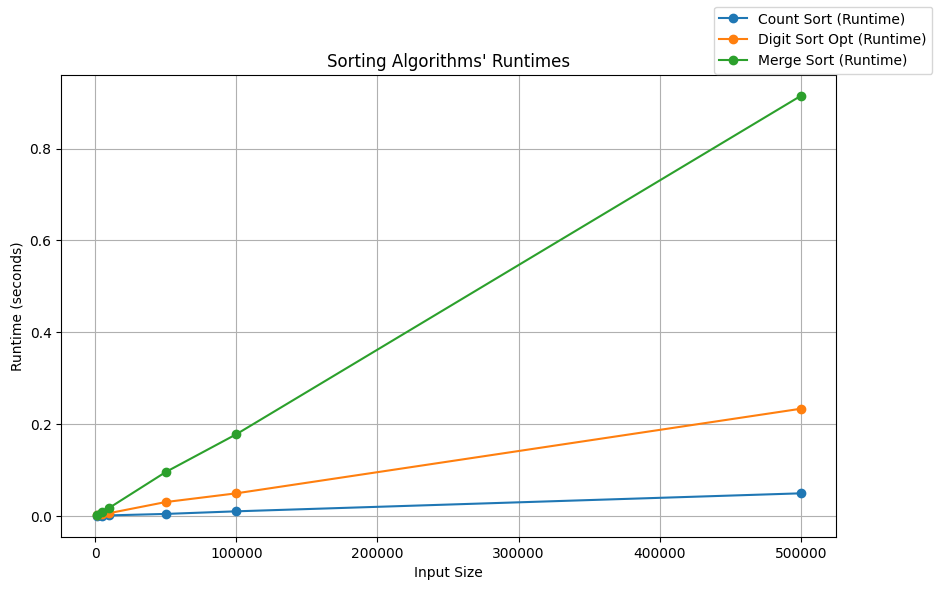

In [22]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

We can see that all sorts manage to sort in a very reasonable time. Moreover, the merge sort, the fastest for the floats is now the slowest for integers being the very reason of the distinction between sorts for floats and integers. 

Let's increase input even further!

In [23]:
input_sizes = [(100000, 100000), (500000, 500000), (1000000, 1000000), (5000000, 5000000), 
               (10000000, 10000000)]

sorting_algorithms = [
    (count_sort, 'Count Sort'),
    (digit_sort_opt, 'Digit Sort Opt'),
    (merge_sort, 'Merge Sort')
]

funcs_params = {
    'count_sort': {},
    'digit_sort_opt': {},
    'merge_sort': {}
}

In [24]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

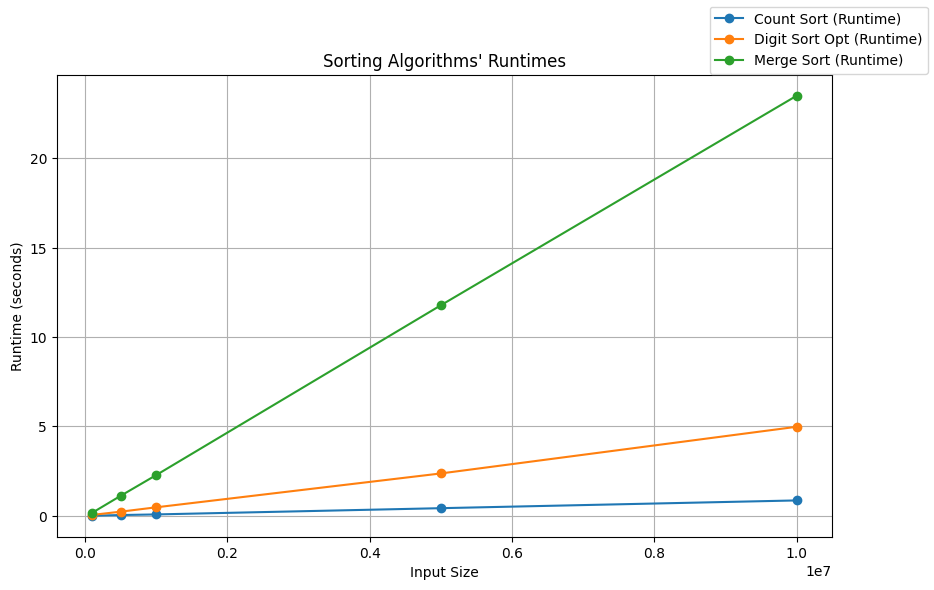

In [25]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

The picture has not changed, which means that the asymptotic part of the plot was reached at the input of size 50k. However, let's increase input even further since some of the sorts still perform within a reasonable time, remove merge sort as an ineffective one for sorting integer arrays and add sorted for comparison.

In [29]:
input_sizes = [(1000000, 1000000), (5000000, 5000000), (10000000, 10000000), 
               (50000000, 50000000), (100000000, 100000000)]

sorting_algorithms = [
    (count_sort, 'Count Sort'),
    (digit_sort_opt, 'Digit Sort Opt'),
    (sorted, 'Sorted')
]

funcs_params = {
    'count_sort': {},
    'digit_sort_opt': {},
    'sorted': {}
}

In [30]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

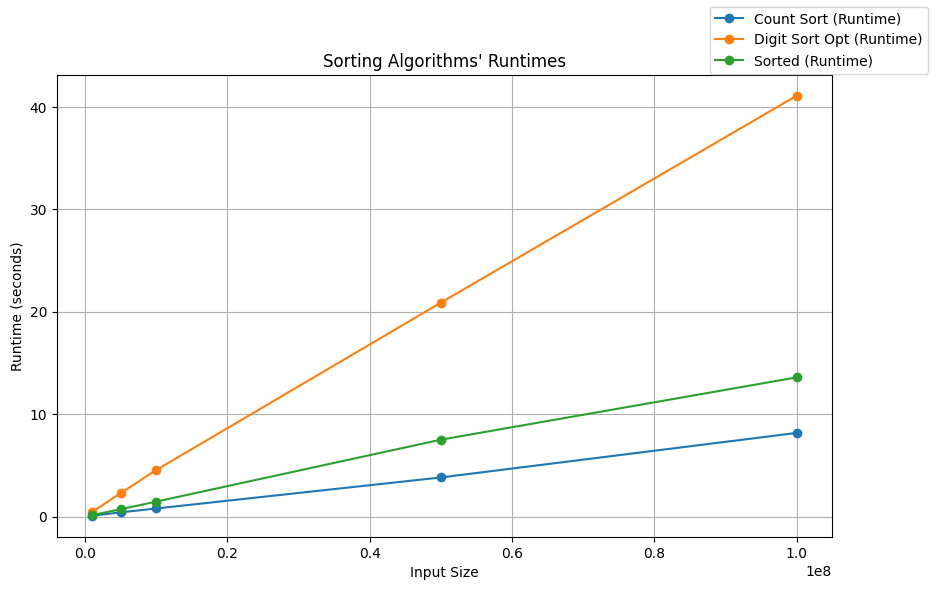

In [31]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

As we see, sorted is a highly optimized function performing better than even radix sort on integers. However, sorts tailored for special cases (such as count sort) still can perform better. Unfortunately, trade-offs are everywhere, and this situation is no exception: counting sort has a drawback. In particular, counting sort is highly susceptible to large number range within an array to be sorted, and with the increase of this range, its performance quickly deteriorates. Let's explore this as an example.

In [32]:
input_sizes = [(1, 1), (5, 5), (10, 10), (50, 50), (100, 100), (500, 500), (1000, 1000)]

sorting_algorithms = [
    (count_sort, 'Count Sort'),
    (digit_sort_opt, 'Digit Sort Opt'),
    (merge_sort, 'Merge Sort')
]

funcs_params = {
    'count_sort': {},
    'merge_sort': {},
    'digit_sort_opt': {}
}

# Here is a large range
input_range = (-1000000, 1000000)

In [33]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_int(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

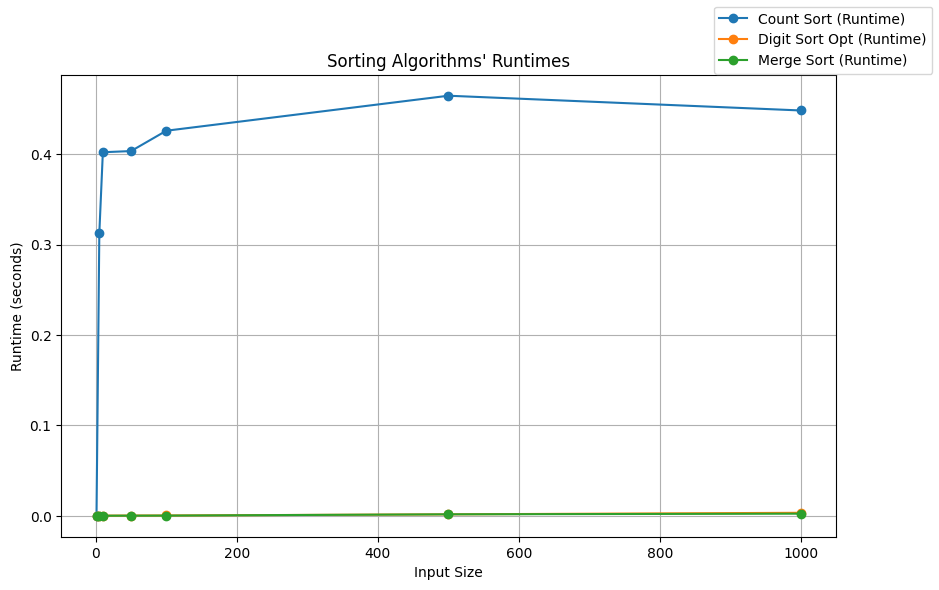

In [34]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

We can see how the count sort performance decreased compared to others'.